In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, FunctionTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import math
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import scipy.sparse as sp


In [12]:
df = pd.read_csv('data.csv')
# Exploración inicial del dataset
print("Dimensiones del dataset:", df.shape)
print("\nInformación del dataset:")
print(df.info())

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("\nTipos de datos de las columnas:")
print(df.dtypes)
# Identificar variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nVariables numéricas:")
print(numeric_cols.tolist())
print("\nVariables categóricas:")
print(categorical_cols.tolist())

Dimensiones del dataset: (7043, 21)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-

In [13]:
# Análisis de datos faltantes
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Crear un DataFrame con los resultados
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentages
})

# Mostrar solo las columnas que tienen valores faltantes (si las hay)
missing_info_filtered = missing_info[missing_info['Missing Values'] > 0]

if len(missing_info_filtered) > 0:
    print("Columnas con valores faltantes:")
    print(missing_info_filtered)
else:
    print("No hay valores faltantes en el dataset")

Columnas con valores faltantes:
              Missing Values  Missing Percentage
TotalCharges              11            0.156183


In [14]:

# Crear una copia del DataFrame para no modificar el original
df_encoded = df.copy()

# Codificar cada variable categórica
label_encoders = {}

for column in categorical_cols:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

print("Primeras 5 filas del dataset codificado:")
print(df_encoded.head())

# Guardar el mapping de la codificación para referencia
encoding_mapping = {}
for column in categorical_cols:
    mapping = dict(zip(label_encoders[column].classes_, 
                      label_encoders[column].transform(label_encoders[column].classes_)))
    encoding_mapping[column] = mapping

print("\nMapeo de codificación para cada variable categórica:")
for column, mapping in encoding_mapping.items():
    print(f"\n{column}:")
    for original, encoded in mapping.items():
        print(f"{original} -> {encoded}")

Primeras 5 filas del dataset codificado:
   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0   

# Análisis de Variables Numéricas
Analizaremos la distribución y estadísticas de las variables numéricas para determinar si necesitan ser escaladas.

Total de filas con TotalCharges no convertibles (NaN): 11
Estadísticas descriptivas de las variables numéricas :
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


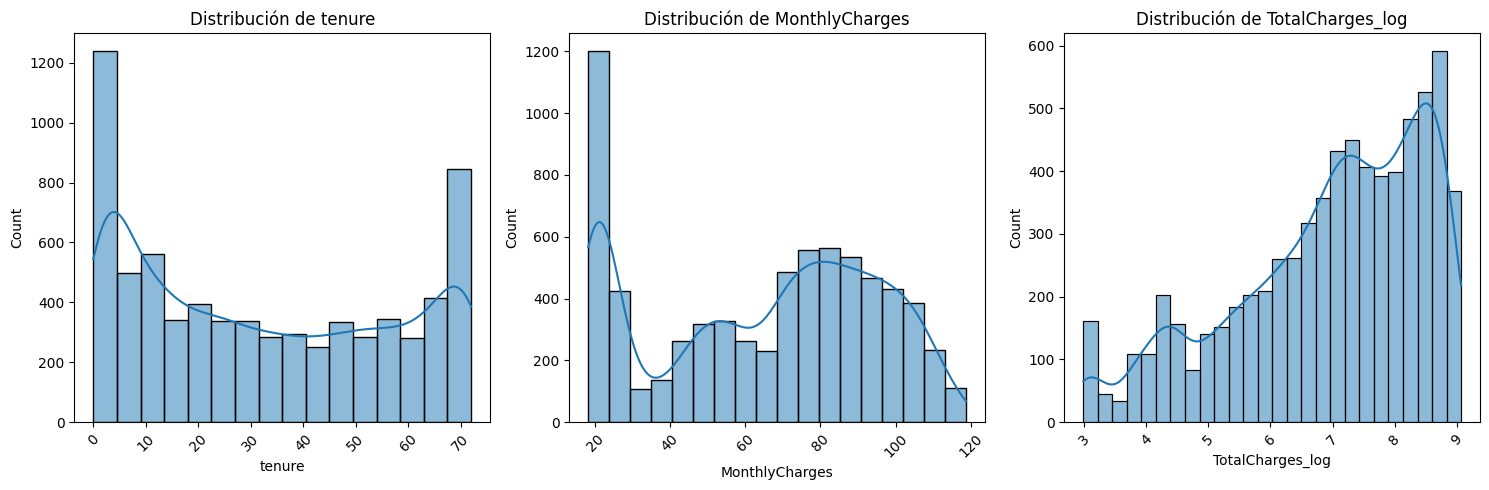


Rango de valores para cada variable numérica:
tenure:
  Min: 0
  Max: 72
  Rango: 72

MonthlyCharges:
  Min: 18.25
  Max: 118.75
  Rango: 100.5

TotalCharges:
  Min: 18.8
  Max: 8684.8
  Rango: 8666.0

Resumen de TotalCharges_log:
count    7032.000000
mean        6.943387
std         1.546438
min         2.985682
25%         5.997571
50%         7.243138
75%         8.241634
max         9.069445
Name: TotalCharges_log, dtype: float64


In [15]:
# Asegurar que TotalCharges sea numérico (ya imputado en la celda anterior)
missing_before = df['TotalCharges'].isna().sum()
print(f"Total de filas con TotalCharges no convertibles (NaN): {missing_before}")
# Generar columna log-transformada para TotalCharges para EDA
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])

numeric_cols = [c for c in ['tenure', 'MonthlyCharges', 'TotalCharges_log'] if c in df.columns]
print("Estadísticas descriptivas de las variables numéricas :")
print(df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# Crear subplots para visualizar la distribución de cada variable numérica
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis de rangos y escalas (mostrando TotalCharges original y log)
print("\nRango de valores para cada variable numérica:")
for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    if col in df.columns:
        print(f"{col}:")
        print(f"  Min: {df[col].min()}")
        print(f"  Max: {df[col].max()}")
        print(f"  Rango: {df[col].max() - df[col].min()}")
        print()

print('Resumen de TotalCharges_log:')
print(df['TotalCharges_log'].describe())

In [16]:
# Prueba de normalidad sobre TotalCharges después de log-transform
tc_log = df['TotalCharges_log'].dropna()
stat_log, p_log = stats.normaltest(tc_log)
print(f"D'Agostino (TotalCharges_log) stat={stat_log:.4f}, p={p_log:.4g}")
if p_log < 0.05:
    print('Conclusión: rechaza H0 -> no sigue distribución normal (p<0.05)')
else:
    print('Conclusión: no se rechaza H0 -> compatible con distribución normal (p>=0.05)')
    
if p_log < 0.05:
        print("No sigue distribución normal -> imputar por mediana")
        impute_value = tc_log.median()
else:
        print("Sigue distribución normal -> imputar por moda")
        impute_value = tc_log.mode().iloc[0]
df['TotalCharges_log']=df['TotalCharges_log'].fillna(impute_value)
print(f"Imputado {missing_before} valores de TotalCharges por {impute_value}")

D'Agostino (TotalCharges_log) stat=562.5313, p=7.045e-123
Conclusión: rechaza H0 -> no sigue distribución normal (p<0.05)
No sigue distribución normal -> imputar por mediana
Imputado 11 valores de TotalCharges por 7.243137628356653


In [17]:
# Escalar las variables numéricas 
scaler = StandardScaler()
columns_to_scale = ['tenure', 'MonthlyCharges']
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

print("Estadísticas descriptivas después del escalado:")
print(df_encoded[columns_to_scale].describe())

Estadísticas descriptivas después del escalado:
             tenure  MonthlyCharges
count  7.043000e+03    7.043000e+03
mean  -2.421273e-17   -6.406285e-17
std    1.000071e+00    1.000071e+00
min   -1.318165e+00   -1.545860e+00
25%   -9.516817e-01   -9.725399e-01
50%   -1.372744e-01    1.857327e-01
75%    9.214551e-01    8.338335e-01
max    1.613701e+00    1.794352e+00


Columnas categóricas a graficar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


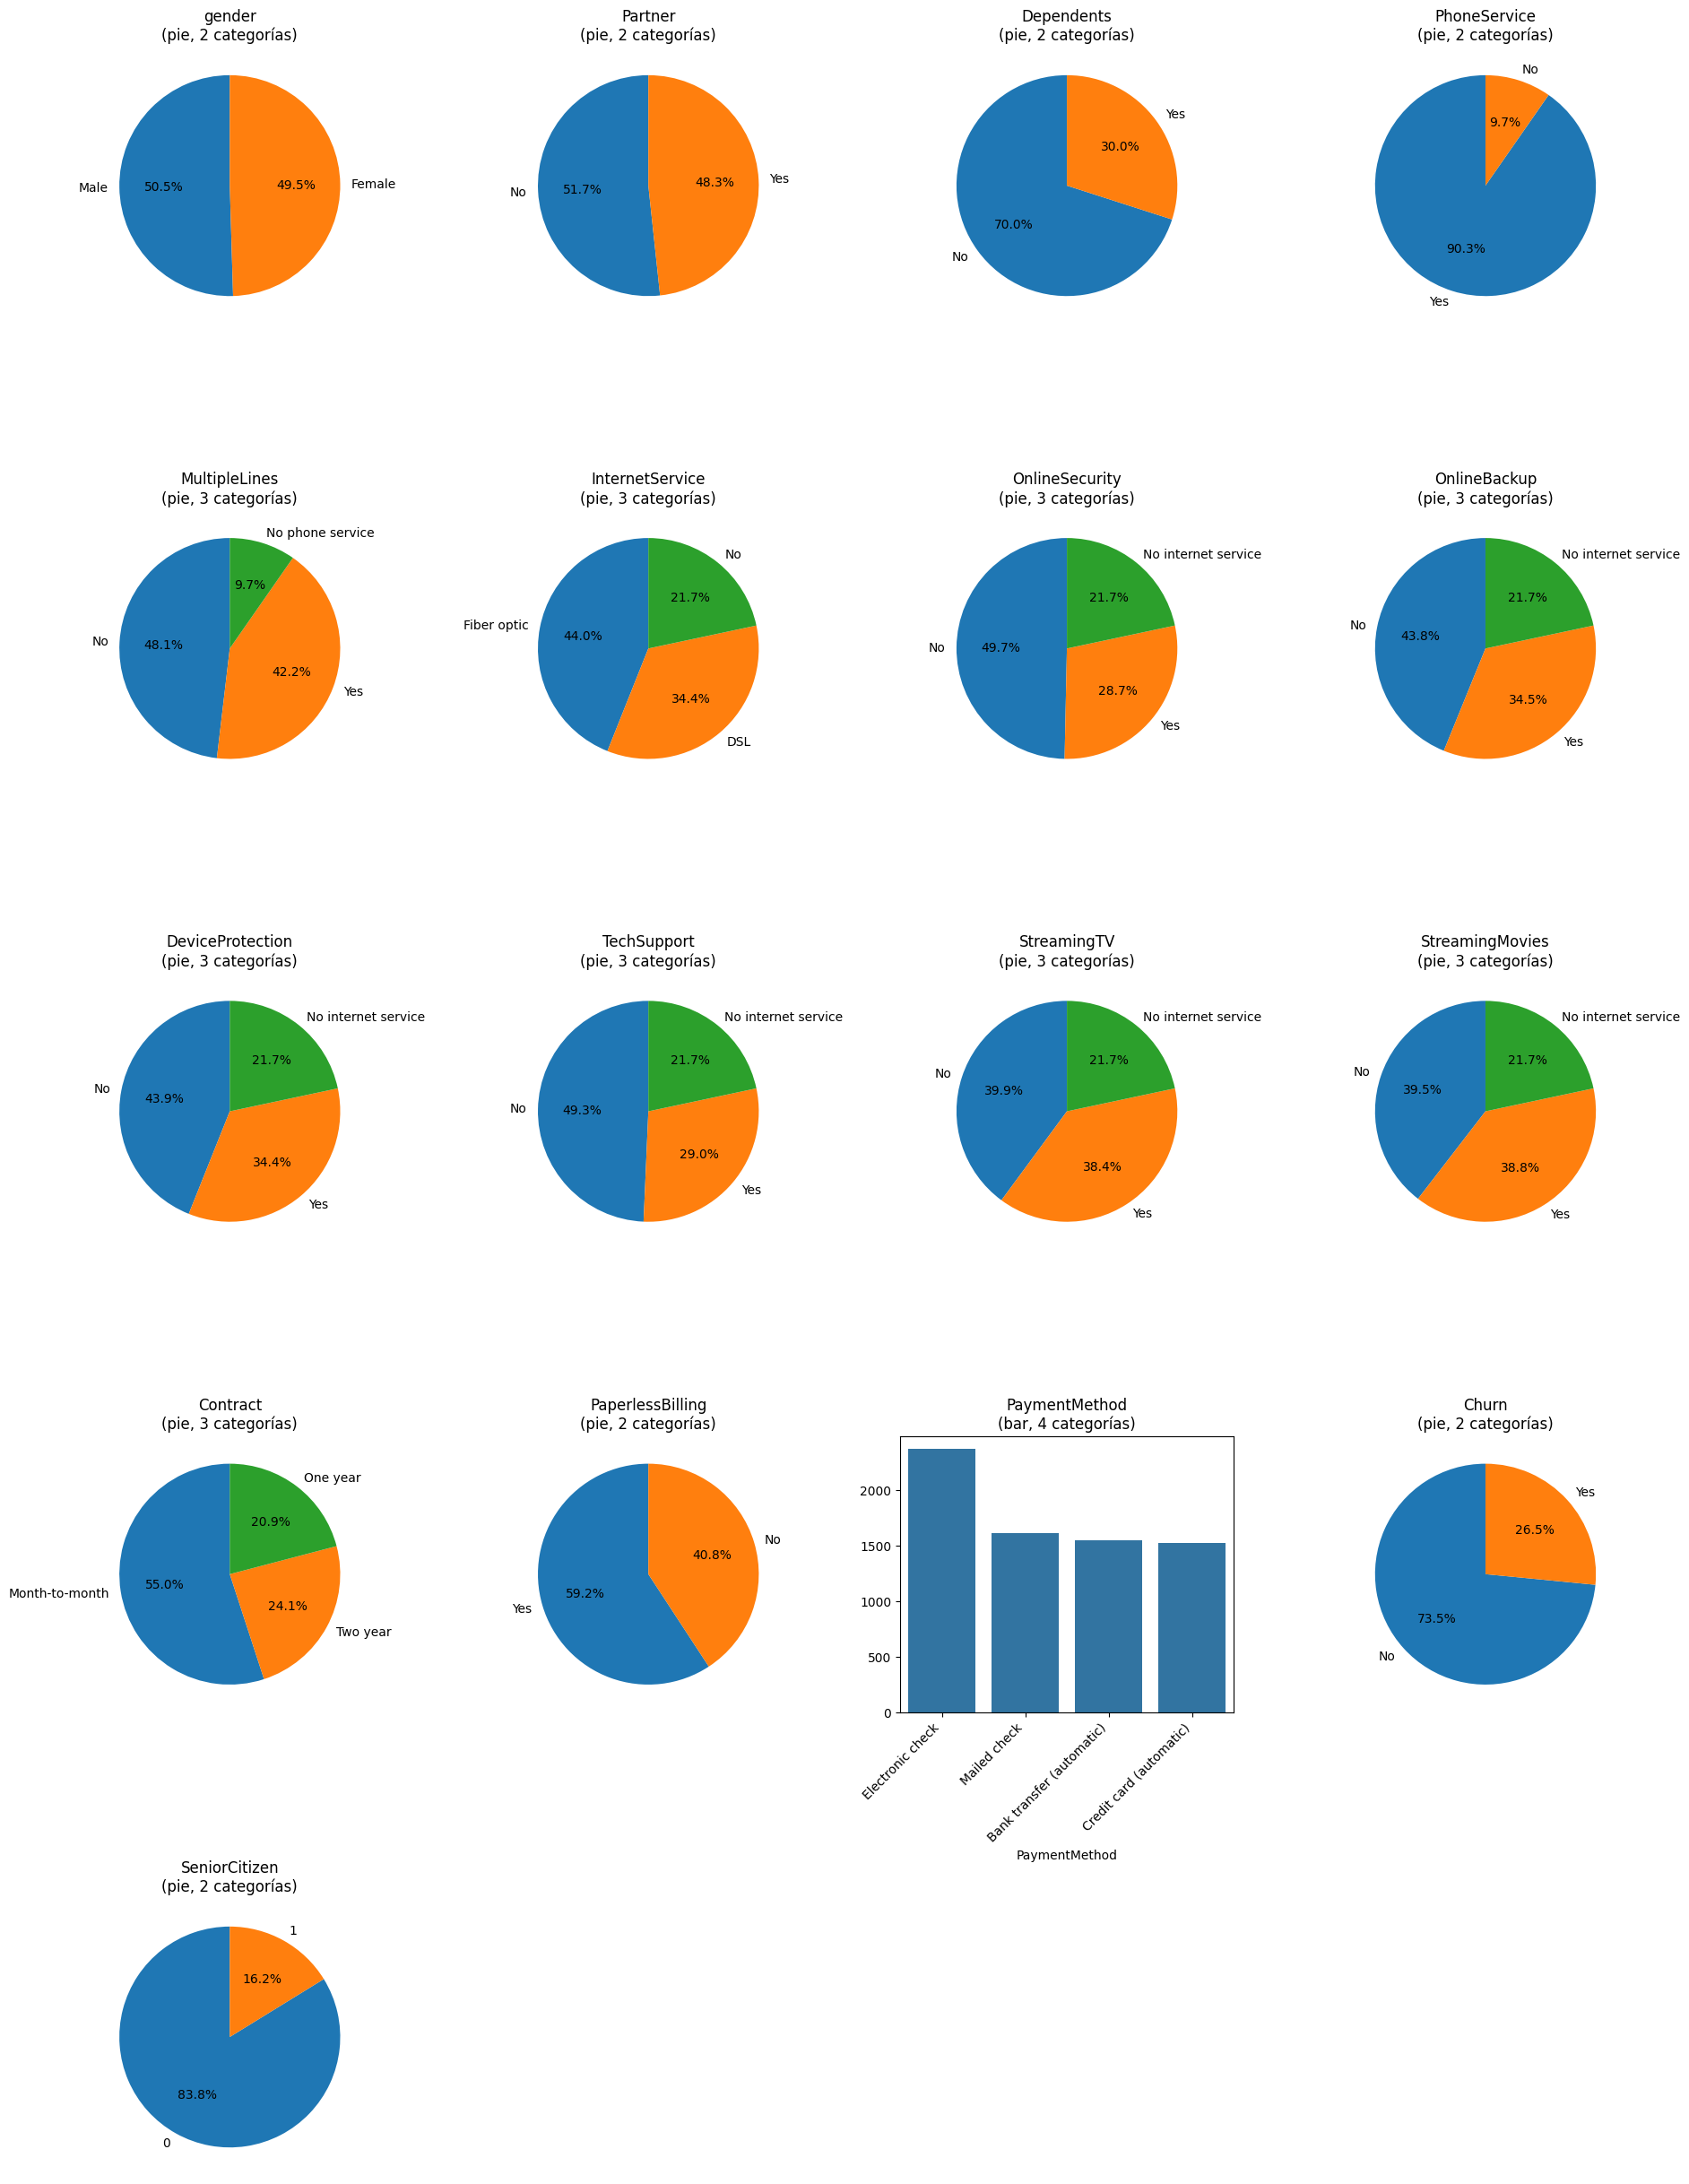

In [18]:
# Graficar variables categóricas: pie si <=3 categorías, barras si >3

# Determinar columnas categóricas (object) y añadir SeniorCitizen como categórica si tiene pocas categorías
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')
categorical_cols.append('SeniorCitizen')

print('Columnas categóricas a graficar:', categorical_cols)

# Calcular número de filas necesarias (4 gráficos por fila)
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

# Crear una figura grande con subplots
fig = plt.figure(figsize=(20, 5*n_rows))

for idx, col in enumerate(categorical_cols, 1):
    counts = df[col].value_counts(dropna=False)
    n_categories = len(counts)
    
    plt.subplot(n_rows, n_cols, idx)
    
    if n_categories <= 3:
        # Pie chart
        plt.pie(counts.values, labels=counts.index.astype(str), autopct='%1.1f%%', startangle=90)
        plt.title(f'{col}\n(pie, {n_categories} categorías)')
    else:
        # Bar chart
        sns.barplot(x=counts.index.astype(str), y=counts.values)
        plt.title(f'{col}\n(bar, {n_categories} categorías)')
        plt.xticks(rotation=45, ha='right')

plt.tight_layout(pad=3.0)
plt.show()


# Preparación del Dataset Final
Crearemos el dataset final con todas las variables procesadas y separaremos las variables predictoras (X) de la variable objetivo (y).

In [19]:
# Crear el dataset final
df_final = df_encoded.copy()

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df_final.drop('Churn', axis=1)
y = df_final['Churn']

print("Forma de X (variables predictoras):", X.shape)
print("Forma de y (variable objetivo):", y.shape)

# Mostrar las primeras filas del dataset final
print("\nPrimeras filas del dataset final:")
print(df_final.head())

# Guardar los nombres de las columnas para referencia futura
feature_names = X.columns.tolist()
print("\nVariables predictoras:")
print(feature_names)

Forma de X (variables predictoras): (7043, 20)
Forma de y (variable objetivo): (7043,)

Primeras filas del dataset final:
   customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0        5375       0              0        1           0 -1.277445   
1        3962       1              0        0           0  0.066327   
2        2564       1              0        0           0 -1.236724   
3        5535       1              0        0           0  0.514251   
4        6511       0              0        0           0 -1.236724   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtectio

In [20]:
# Exportar el dataset procesado a CSV
output_file = 'processed_data.csv'
df_final.to_csv(output_file, index=False)
print(f"Dataset procesado exportado a: {output_file}")
print(f"Dimensiones del dataset exportado: {df_final.shape}")

Dataset procesado exportado a: processed_data.csv
Dimensiones del dataset exportado: (7043, 21)
